In [3]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline
from IPython.display import Math
from IPython.display import display, Math, Latex
from decimal import Decimal
import statistics

In [2]:
import os
os.getcwd()

'/Users/srt'

In [4]:
os.chdir("Desktop/SEM4/Initial_CSV/")

In [5]:
ls


100Dislocation.png          36Dislocation.png
128D/                       38D/
128Dislocation.png          38Dislocation.png
20D/                        40D/
28D/                        40Dislocation.png
28Dislocation.png           42D/
30D/                        60D/
30D_1.csv                   60Dislocation.png
30Dislocation.png           80Dislocation.png
32D/                        80Dislocation1.png
32Dislocation.png           90Dislocation.png
34D/                        96D/
34Dislocation.png           96Dislocation.png
36D/                        SegmentLengthResult100.txt


In [6]:
#Reading Data
#data = pd.read_csv("Desktop/MTP_2/Data_Colection/job311219_2/paraview/30D_1_012.csv")
#st_strain =pd.read_csv("Desktop/MTP_2/Data_Colection/job311219_2/30D_1.csv")
#file_name = st_strain.iloc[:,0].values  #Total dislocation
#stress = st_strain.iloc[:,1].values  #stress
#strain = st_strain.iloc[:,2].values  #strain

data = pd.read_csv("SegmentLengthResult100.txt",delimiter=" ", float_precision = "high",skiprows = 1)


In [22]:
stress = data.iloc[:,2].values
strain = data.iloc[:,3].values

In [23]:
dis_density = data.iloc[:,1].values

In [24]:
d = {'stress' : pd.Series(stress), 'strain': pd.Series(strain)} 
  
st_strain =pd.DataFrame(d)

In [25]:
st_strain

,stress,strain
0,799100.0,0.000006
1,1155000.0,0.000009
2,1398000.0,0.000011
3,1970000.0,0.000016
4,2361000.0,0.000018
...,...,...
3773,86440000.0,0.002610
3774,86300000.0,0.002611
3775,86040000.0,0.002611
3776,85710000.0,0.002612


In [26]:
def cRSS(alpha):
    if alpha == 1:
        b = (1/1.414)*(np.array([-1,1,0]))
        n = (1/1.732)*(np.array([-1,-1,1]))
        d = data.iloc[:,4].values
        return b,n 
    if alpha == 2:
        b = (1/1.414)*(np.array([-1,1,0]))
        n = (1/1.732)*(np.array([1,1,1]))
        d = data.iloc[:,5].values
        return b,n
    if alpha == 3: 
        b = (1/1.414)*(np.array([0,1,-1]))
        n = (1/1.732)*(np.array([-1,1,1]))
        d = data.iloc[:,6].values
        return b,n
    if alpha ==4 :
        b = (1/1.414)*(np.array([0,1,-1]))
        n = (1/1.732)*(np.array([1,1,1]))
        d = data.iloc[:,7].values
        return b,n
    if alpha ==5 :
        b = (1/1.414)*(np.array([-1,0,-1]))
        n = (1/1.732)*(np.array([-1,1,1]))
        d = data.iloc[:,8].values
        return b,n
    if alpha == 6:
        b = (1/1.414)*(np.array([-1,0,-1]))
        n = (1/1.732)*(np.array([-1,-1,1]))
        d = data.iloc[:,9].values
        return b,n
    if alpha == 7:
        b = (1/1.414)*(np.array([1,0,-1]))
        n = (1/1.732)*(np.array([1,-1,1]))
        d = data.iloc[:,10].values
        return b,n
    if alpha == 8:
        b = (1/1.414)*(np.array([1,0,-1]))
        n = (1/1.732)*(np.array([1,1,1]))
        d = data.iloc[:,11].values
        return b,n
    if alpha == 9:
        b = (1/1.414)*(np.array([0,-1,-1]))
        n = (1/1.732)*(np.array([1,-1,1]))
        d = data.iloc[:,12].values
        return b,n
    if alpha == 10:
        b = (1/1.414)*(np.array([0,-1,-1]))
        n = (1/1.732)*(np.array([-1,-1,1]))
        d = data.iloc[:,13].values
        return b,n
    if alpha == 11:
        b = (1/1.414)*(np.array([-1,-1,0]))
        n = (1/1.732)*(np.array([1,-1,1]))
        d = data.iloc[:,14].values
        return b,n
    if alpha == 12:
        b = (1/1.414)*(np.array([-1,-1,0]))
        n = (1/1.732)*(np.array([-1,1,1]))
        d = data.iloc[:,15].values
        return b,n
    else :
        print ("No slip system exist")

        
s11 = 0
s12 = 0
s13 = 0
s21 = 0
s22 = 0
s23 = 0
s31 = 0
s32 = 0
    
def m_mat(alpha,i,j):
    #print(cRSS(alpha))
    x = cRSS(alpha)[0][i-1] * cRSS(alpha)[1][j-1]
    return x
def rSS(alpha):
    y = 0
    for i in range(3):
        for j in range(3):
            #print("sigma =",sigma[i][j])
            #print("m_mat =", m_mat(alpha,i+1,j+1))
            
            y = y + (sigma[i][j])*m_mat(alpha,i+1,j+1)
            #print("y =",y)
    return abs(y)
p = []
for ll in range(1,13):
    slip_rss = []
    for mm in range (len(stress)):
        s33 = stress[mm]
        sigma = np.array([[s11,s12,s13],[s21,s22,s23],[s31,s32,s33]])
        slip_rss.append(rSS(ll))
    st_strain["Slip_rSS{}".format(ll)] = slip_rss



In [40]:
def cRSS(alpha):
    if alpha == 1:
        b = (1/1.414)*(np.array([-1,1,0]))
        n = (1/1.732)*(np.array([-1,-1,1]))
        d = data.iloc[:,4].values
        return b,n,d 
    if alpha == 2:
        b = (1/1.414)*(np.array([-1,1,0]))
        n = (1/1.732)*(np.array([1,1,1]))
        d = data.iloc[:,5].values
        return b,n,d
    if alpha == 3: 
        b = (1/1.414)*(np.array([0,1,-1]))
        n = (1/1.732)*(np.array([-1,1,1]))
        d = data.iloc[:,6].values
        return b,n,d
    if alpha ==4 :
        b = (1/1.414)*(np.array([0,1,-1]))
        n = (1/1.732)*(np.array([1,1,1]))
        d = data.iloc[:,7].values
        return b,n,d
    if alpha ==5 :
        b = (1/1.414)*(np.array([-1,0,-1]))
        n = (1/1.732)*(np.array([-1,1,1]))
        d = data.iloc[:,8].values
        return b,n,d
    if alpha == 6:
        b = (1/1.414)*(np.array([-1,0,-1]))
        n = (1/1.732)*(np.array([-1,-1,1]))
        d = data.iloc[:,9].values
        return b,n,d
    if alpha == 7:
        b = (1/1.414)*(np.array([1,0,-1]))
        n = (1/1.732)*(np.array([1,-1,1]))
        d = data.iloc[:,10].values
        return b,n,d
    if alpha == 8:
        b = (1/1.414)*(np.array([1,0,-1]))
        n = (1/1.732)*(np.array([1,1,1]))
        d = data.iloc[:,11].values
        return b,n,d
    if alpha == 9:
        b = (1/1.414)*(np.array([0,-1,-1]))
        n = (1/1.732)*(np.array([1,-1,1]))
        d = data.iloc[:,12].values
        return b,n,d
    if alpha == 10:
        b = (1/1.414)*(np.array([0,-1,-1]))
        n = (1/1.732)*(np.array([-1,-1,1]))
        d = data.iloc[:,13].values
        return b,n,d
    if alpha == 11:
        b = (1/1.414)*(np.array([-1,-1,0]))
        n = (1/1.732)*(np.array([1,-1,1]))
        d = data.iloc[:,14].values
        return b,n,d
    if alpha == 12:
        b = (1/1.414)*(np.array([-1,-1,0]))
        n = (1/1.732)*(np.array([-1,1,1]))
        d = data.iloc[:,15].values
        return b,n,d
    else :
        print ("No slip system exist")

In [39]:
cRSS(2)[2][1]

0.0

In [48]:
    s11 = 0
    s12 = 0
    s13 = 0
    s21 = 0
    s22 = 0
    s23 = 0
    s31 = 0
    s32 = 0
    for ll in range(1,13):
        slip_rss = []
        for mm in range (len(stress)):
        
            s33 = 0.5*44*0.26*(dis_density[mm])**0.5
            slip_rss.append(s33)
        st_strain["rSS_prime{}".format(ll)] = slip_rss
    

In [54]:
if st_strain["rSS_prime3"][0] > st_strain["Slip_rSS3"][0]:
    print("a") 

a


In [50]:
st_strain["Slip_rSS3"]

0       3.262901e+05
1       4.716118e+05
2       5.708341e+05
3       8.043942e+05
4       9.640481e+05
            ...     
3773    3.529535e+07
3774    3.523818e+07
3775    3.513202e+07
3776    3.499727e+07
3777    3.494827e+07
Name: Slip_rSS3, Length: 3778, dtype: float64

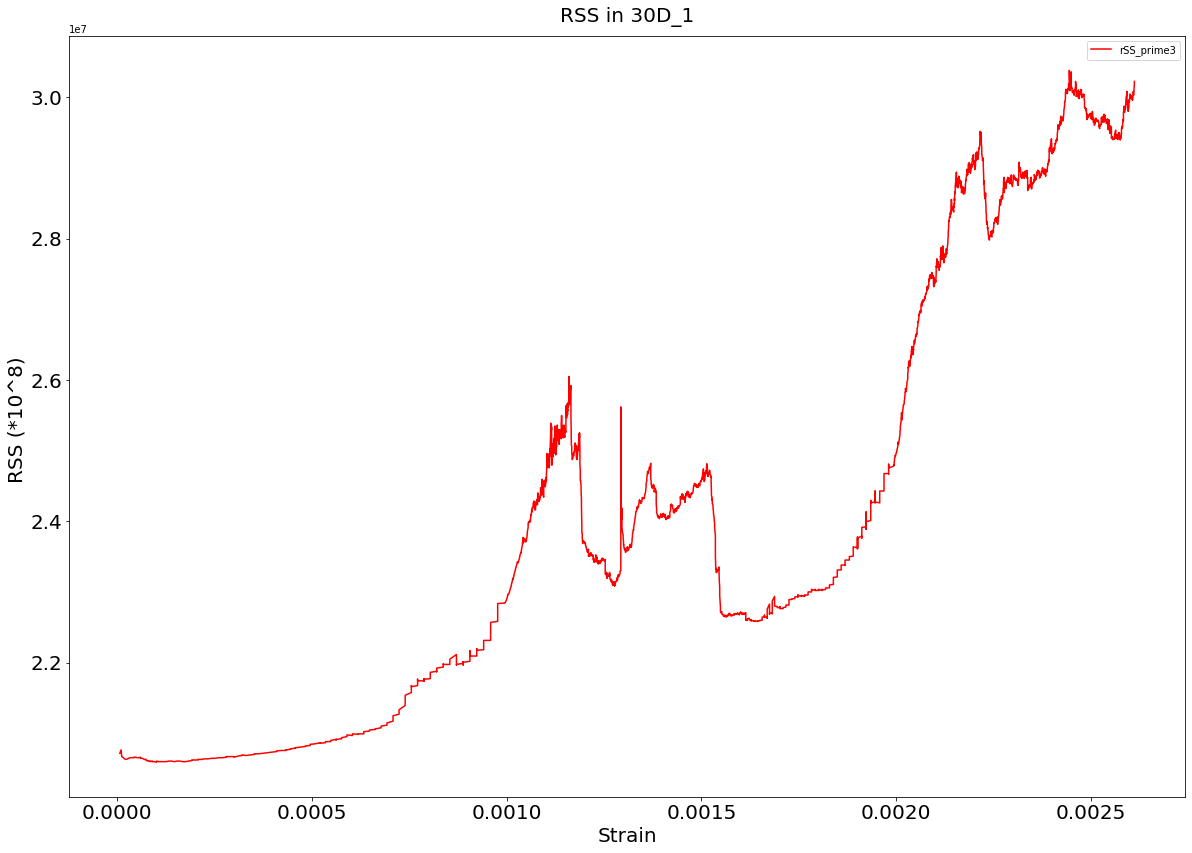

In [55]:
#saving file 
#st_strain.to_csv('Desktop/30D_1_slip.csv', index=False)

#plotting CRSS
fig = plt.figure(figsize = (20,14))
ax = plt.axes()
#plt.plot(strain,stress, label = "Stress")
#plt.plot(strain,st_strain["Slip_rSS3"],color='g',label="Slip_rSS3")
plt.plot(strain,st_strain["rSS_prime3"],color='r',label="rSS_prime3")

legend = ax.legend(loc='upper right')
plt.title("RSS in 30D_1",fontsize = 20, y=1.01)
plt.xlabel("Strain",fontsize = 20)
plt.ylabel("RSS (*10^8) ",fontsize = 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig("RSS_100D_1.png")
plt.show()





In [ ]:
    s11 = 0
    s12 = 0
    s13 = 0
    s21 = 0
    s22 = 0
    s23 = 0
    s31 = 0
    s32 = 0
    for ll in range(1,13):
        slip_rss = []
        for mm in range (len(stress)):
            k = cRSS(ll)[2][mm]
            if k == 0:
                s33 = 0
            else:
                
                s33 = 0.5*44*0.26*(1/k)**0.5
            sigma = np.array([[s11,s12,s13],[s21,s22,s23],[s31,s32,s33]])
            slip_rss.append(rSS(ll))
        st_strain["rSS_doubleprime{}".format(ll)] = slip_rss
    

In [4]:
p = st_strain.iloc[0:,3:]
#mean and standard Deviation
st_strain["mean"] = p.mean(axis=1)

st_strain["std_dev"] = p.std(axis=1)
print(st_strain)

         Unnamed: 0       stress    strain  Slip_rSS1  Slip_rSS2  \
0      30D_1_01.csv   53800000.0  0.000377        0.0        0.0   
1      30D_1_02.csv   86300000.0  0.000607        0.0        0.0   
2      30D_1_03.csv  110000000.0  0.000774        0.0        0.0   
3      30D_1_04.csv  126000000.0  0.000891        0.0        0.0   
4      30D_1_05.csv  154000000.0  0.001110        0.0        0.0   
5      30D_1_06.csv  124000000.0  0.002040        0.0        0.0   
6      30D_1_07.csv   99800000.0  0.002250        0.0        0.0   
7      30D_1_08.csv   77900000.0  0.002430        0.0        0.0   
8      30D_1_09.csv   65100000.0  0.002590        0.0        0.0   
9     30D_1_010.csv   56900000.0  0.002710        0.0        0.0   
10    30D_1_011.csv   60400000.0  0.002810        0.0        0.0   
11    30D_1_012.csv   63400000.0  0.002940        0.0        0.0   
12    30D_1_013.csv   64800000.0  0.003010        0.0        0.0   
13    30D_1_014.csv   65300000.0  0.003080      

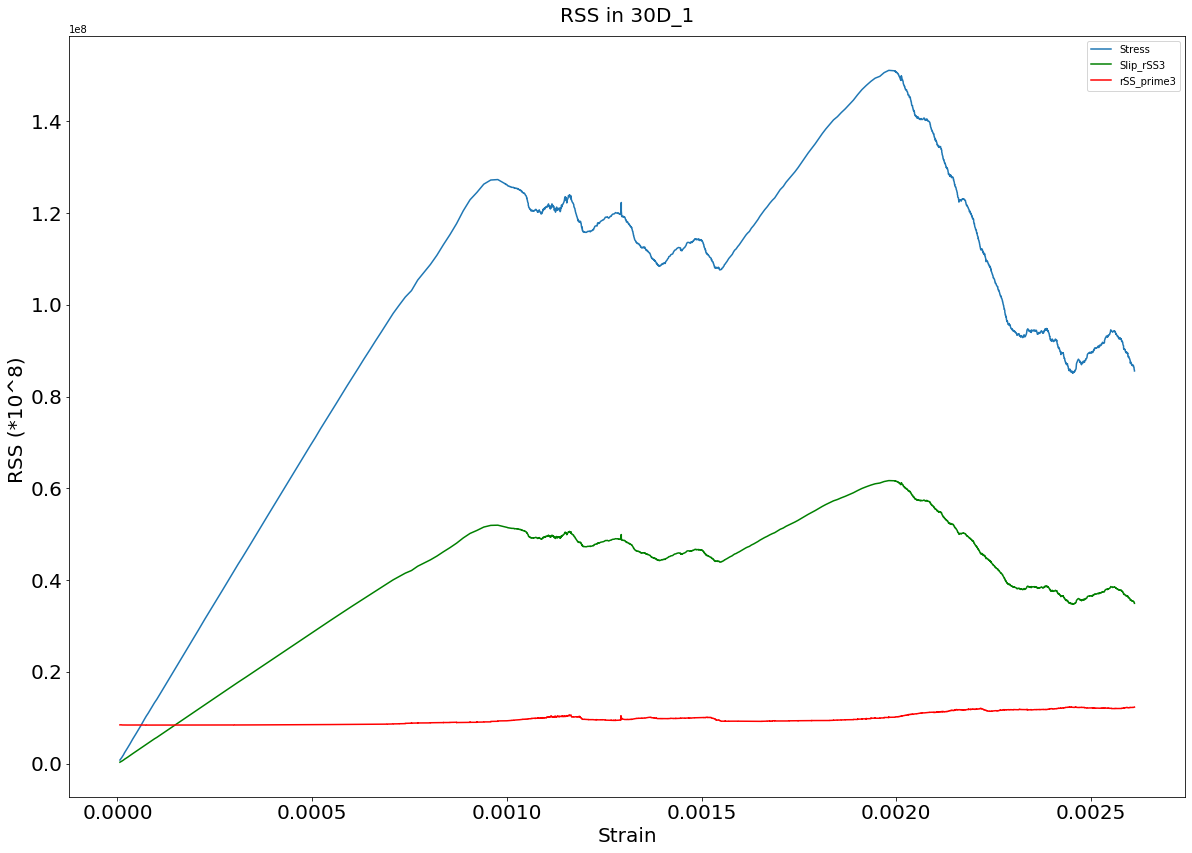

In [44]:
#saving file 
#st_strain.to_csv('Desktop/30D_1_slip.csv', index=False)

#plotting CRSS
fig = plt.figure(figsize = (20,14))
ax = plt.axes()
plt.plot(strain,stress, label = "Stress")
plt.plot(strain,st_strain["Slip_rSS3"],color='g',label="Slip_rSS3")
plt.plot(strain,st_strain["rSS_prime3"],color='r',label="rSS_prime3")

legend = ax.legend(loc='upper right')
plt.title("RSS in 30D_1",fontsize = 20, y=1.01)
plt.xlabel("Strain",fontsize = 20)
plt.ylabel("RSS (*10^8) ",fontsize = 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig("RSS_100D_1.png")
plt.show()





In [59]:
q = 3 #SLIP SYSTEM for which you want curve

i = 0
slip1_1 = []
while strain[i] <= 0.01:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_1.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_1 = statistics.mean(slip1_1)
sd1_1 = statistics.stdev(slip1_1)




i = 0
slip1_2 = []
while strain[i] <= 0.02:
    #print(strain[i])
    if strain[i]<=0.01:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_2.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_2 = statistics.mean(slip1_2)
sd1_2 = statistics.stdev(slip1_2)

i = 0
slip1_3 = []
while strain[i] <= 0.03:
    #print(strain[i])
    if strain[i]<=0.02:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_3.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_3 = statistics.mean(slip1_3)
sd1_3 = statistics.stdev(slip1_3)
print(mea3,sd3)

i = 0
slip1_4 = []
while strain[i] <= 0.04:
    #print(strain[i])
    if strain[i]<=0.03:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_4.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_4 = statistics.mean(slip1_4)
sd1_4 = statistics.stdev(slip1_4)
print(mea1_4,sd1_4)

i = 0
slip1_5 = []
while strain[i] <= 0.05:
    #print(strain[i])
    if strain[i]<=0.04:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_5.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_5 = statistics.mean(slip1_5)
sd1_5 = statistics.stdev(slip1_5)
print(mea1_5,sd1_5)



i = 0
slip1_6 = []
while strain[i] <= 0.06:
    #print(strain[i])
    if strain[i]<=0.05:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_6.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_6 = statistics.mean(slip1_6)
sd1_6 = statistics.stdev(slip1_6)
print(mea1_6,sd1_6)

i = 0
slip1_7 = []
while strain[i] <= 0.07:
    #print(strain[i])
    if strain[i]<=0.06:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_7.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_7 = statistics.mean(slip1_7)
sd1_7 = statistics.stdev(slip1_7)
print(mea1_7,sd1_7)

i = 0
slip1_8 = []
while strain[i] <= 0.08:
    #print(strain[i])
    if strain[i]<=0.07:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_8.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_8 = statistics.mean(slip1_8)
sd1_8 = statistics.stdev(slip1_8)
print(mea1_8,sd1_8)


i = 0
slip1_9 = []
while strain[i] <= 0.09:
    #print(strain[i])
    if strain[i]<=0.08:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_9.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_9 = statistics.mean(slip1_9)
sd1_9 = statistics.stdev(slip1_9)
print(mea1_9,sd1_9)

i = 0
slip1_10 = []
while strain[i] <= 0.1:
    #print(strain[i])
    if strain[i]<=0.09:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_10.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_10 = statistics.mean(slip1_10)
sd1_10 = statistics.stdev(slip1_10)
print(mea1_10,sd1_10)

i = 0
slip1_11 = []
while strain[i] <= 0.11:
    #print(strain[i])
    if strain[i]<=0.1:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_11.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_11 = statistics.mean(slip1_11)
sd1_11 = statistics.stdev(slip1_11)
print(mea1_11,sd1_11)

i = 0
slip1_12 = []
while strain[i] <= 0.12:
    #print(strain[i])
    if strain[i]<=0.11:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_12.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_12 = statistics.mean(slip1_12)
sd1_12 = statistics.stdev(slip1_12)
print(mea1_12,sd1_12)





0.000377
0.000607
0.0007740000000000001
0.000891
0.00111
0.00204
0.00225
0.00243
0.00259
0.00271
0.00281
0.00294
0.00301
0.0030800000000000003
0.00314
0.00321
0.00329
0.00336
0.0034200000000000003
0.0034700000000000004
0.00353
0.00359
0.00365
0.00371
0.00377
0.00383
0.00389
0.00395
0.0040100000000000005
0.004070000000000001
0.00412
0.00419
0.00425
0.0043100000000000005
0.004370000000000001
0.00443
0.00449
0.00455
0.00461
0.0046700000000000005
0.00473
0.00479
0.00486
0.00491
0.00498
0.00506
0.00514
0.00521
0.00529
0.005370000000000001
0.00544
0.005520000000000001
0.00559
0.005679999999999999
0.00575
0.00583
0.00592
0.006
0.00608
0.00618
0.00626
0.00635
0.00644
0.006529999999999999
0.00662
0.0067
0.006790000000000001
0.00688
0.0069700000000000005
0.00705
0.007120000000000001
0.0072099999999999985
0.0073
0.007409999999999998
0.0075099999999999984
0.00761
0.0077
0.007790000000000002
0.00788
0.00798
0.00808
0.008190000000000001
0.00831
0.008409999999999999
0.00851
0.0086
0.00869
0.00877
0.0

In [60]:
mean_ = [mea1_1,mea1_2,mea1_3,mea1_4,mea1_5,mea1_6,mea1_7,mea1_8,mea1_9,mea1_10,mea1_11,mea1_12]
std_ = [sd1_1,sd1_2,sd1_3,sd1_4,sd1_5,sd1_6,sd1_7,sd1_8,sd1_9,sd1_10,sd1_11,sd1_12]

data_to_plot = [slip1_1, slip1_2, slip1_3, slip1_4, slip1_5, slip1_6, slip1_7, slip1_8, slip1_9, slip1_10, slip1_11, slip1_12]

No handles with labels found to put in legend.


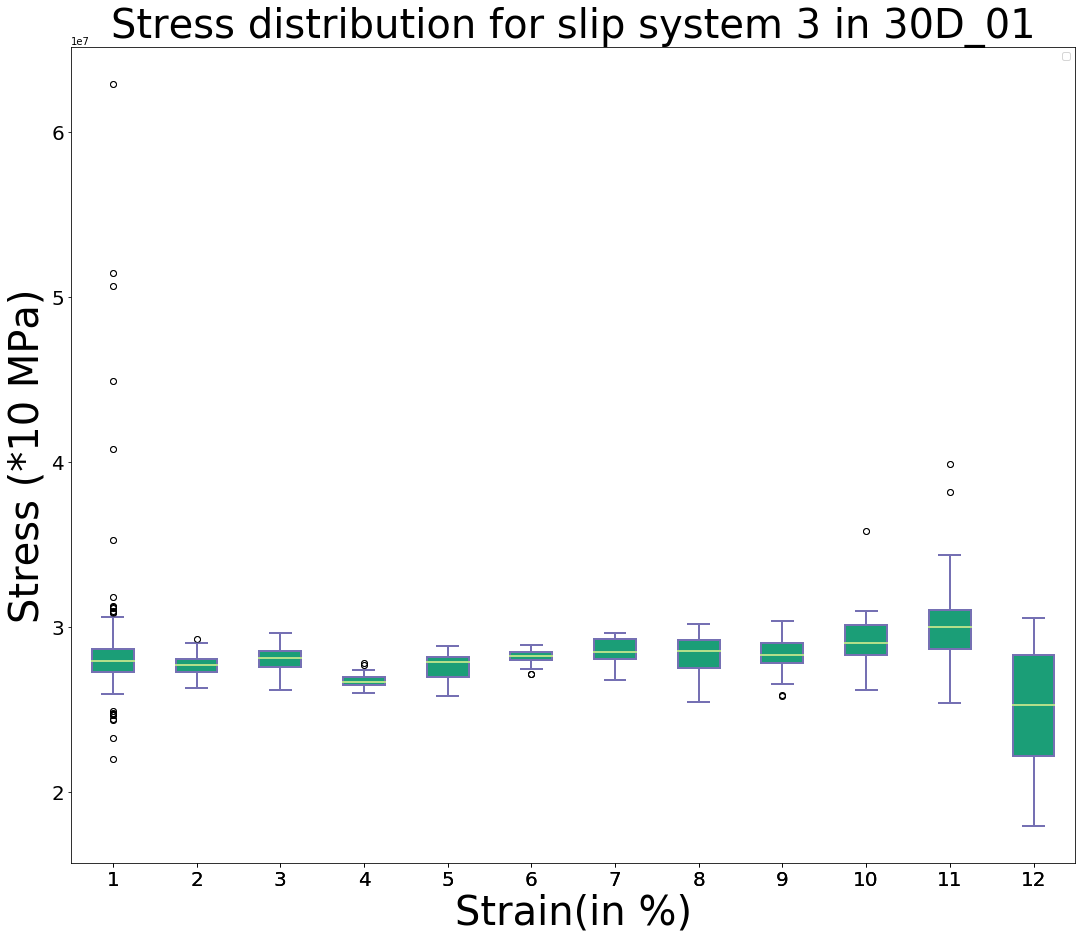

In [65]:
Nu_slip = np.arange(1,13)

fig = plt.figure(figsize = (18,15))
ax = plt.axes()
#ax.bar(Nu_slip,mean_ , label= "Slip system 1");
#mean_slip = [np.mean(slip_syst)]*len(Nu_slip)
#std_slip = [np.std(slip_syst)]*len(Nu_slip)

#mean_line = ax.plot(Nu_slip,mean_slip, label='Mean={}'.format(mean_slip[0]), linestyle='--')
#std_dev = ax.plot(Nu_slip,std_slip, label = "Standard Deviation ={}".format(std_slip[0]), linestyle="-.")

#plt.axis([0, 12, 0, 220])
#legend = ax.legend(loc='upper right')
# Create the boxplot
bp = ax.boxplot(data_to_plot)
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)
plt.xlabel("Strain(in %)",fontsize = 40)
plt.ylabel("resolved shear stress (*10 MPa)", fontsize =40)
plt.title("rSS distribution for slip system 3 in 30D_01",fontsize = 40)
#plt.savefig("0.5%30D.png")
plt.show()


In [52]:
Nu_slip = np.arange(0.01,0.13,0.01)
print(len(Nu_slip))

12


In [67]:
q = 3 #SLIP SYSTEM for which you want curve

i = 0
slip1_1 = []
while strain[i] <= 0.01:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_1.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_1 = statistics.mean(slip1_1)
sd1_1 = statistics.stdev(slip1_1)


i = 0
slip1_2 = []
while strain[i] <= 0.02:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_2.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_2 = statistics.mean(slip1_2)
sd1_2 = statistics.stdev(slip1_2)

i = 0
slip1_3 = []
while strain[i] <= 0.03:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_3.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_3 = statistics.mean(slip1_3)
sd1_3 = statistics.stdev(slip1_3)
print(mea3,sd3)

i = 0
slip1_4 = []
while strain[i] <= 0.04:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_4.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_4 = statistics.mean(slip1_4)
sd1_4 = statistics.stdev(slip1_4)
print(mea1_4,sd1_4)

i = 0
slip1_5 = []
while strain[i] <= 0.05:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_5.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_5 = statistics.mean(slip1_5)
sd1_5 = statistics.stdev(slip1_5)
print(mea1_5,sd1_5)



i = 0
slip1_6 = []
while strain[i] <= 0.06:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_6.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_6 = statistics.mean(slip1_6)
sd1_6 = statistics.stdev(slip1_6)
print(mea1_6,sd1_6)

i = 0
slip1_7 = []
while strain[i] <= 0.07:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_7.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_7 = statistics.mean(slip1_7)
sd1_7 = statistics.stdev(slip1_7)
print(mea1_7,sd1_7)

i = 0
slip1_8 = []
while strain[i] <= 0.08:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_8.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_8 = statistics.mean(slip1_8)
sd1_8 = statistics.stdev(slip1_8)
print(mea1_8,sd1_8)


i = 0
slip1_9 = []
while strain[i] <= 0.09:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_9.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_9 = statistics.mean(slip1_9)
sd1_9 = statistics.stdev(slip1_9)
print(mea1_9,sd1_9)

i = 0
slip1_10 = []
while strain[i] <= 0.1:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_10.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_10 = statistics.mean(slip1_10)
sd1_10 = statistics.stdev(slip1_10)
print(mea1_10,sd1_10)

i = 0
slip1_11 = []
while strain[i] <= 0.11:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_11.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_11 = statistics.mean(slip1_11)
sd1_11 = statistics.stdev(slip1_11)
print(mea1_11,sd1_11)

i = 0
slip1_12 = []
while strain[i] <= 0.12:
    if strain[i]<=0.002710:
        i = i+1
        continue
    else:
        print(strain[i])
        slip1_12.append(st_strain["Slip_rSS{}".format(q)][i])
        i = i+1
mea1_12 = statistics.mean(slip1_12)
sd1_12 = statistics.stdev(slip1_12)
print(mea1_12,sd1_12)





0.00281
0.00294
0.00301
0.0030800000000000003
0.00314
0.00321
0.00329
0.00336
0.0034200000000000003
0.0034700000000000004
0.00353
0.00359
0.00365
0.00371
0.00377
0.00383
0.00389
0.00395
0.0040100000000000005
0.004070000000000001
0.00412
0.00419
0.00425
0.0043100000000000005
0.004370000000000001
0.00443
0.00449
0.00455
0.00461
0.0046700000000000005
0.00473
0.00479
0.00486
0.00491
0.00498
0.00506
0.00514
0.00521
0.00529
0.005370000000000001
0.00544
0.005520000000000001
0.00559
0.005679999999999999
0.00575
0.00583
0.00592
0.006
0.00608
0.00618
0.00626
0.00635
0.00644
0.006529999999999999
0.00662
0.0067
0.006790000000000001
0.00688
0.0069700000000000005
0.00705
0.007120000000000001
0.0072099999999999985
0.0073
0.007409999999999998
0.0075099999999999984
0.00761
0.0077
0.007790000000000002
0.00788
0.00798
0.00808
0.008190000000000001
0.00831
0.008409999999999999
0.00851
0.0086
0.00869
0.00877
0.008870000000000001
0.00896
0.00905
0.00914
0.00923
0.00932
0.00942
0.00951
0.0096
0.00969
0.00978


0.00449
0.00455
0.00461
0.0046700000000000005
0.00473
0.00479
0.00486
0.00491
0.00498
0.00506
0.00514
0.00521
0.00529
0.005370000000000001
0.00544
0.005520000000000001
0.00559
0.005679999999999999
0.00575
0.00583
0.00592
0.006
0.00608
0.00618
0.00626
0.00635
0.00644
0.006529999999999999
0.00662
0.0067
0.006790000000000001
0.00688
0.0069700000000000005
0.00705
0.007120000000000001
0.0072099999999999985
0.0073
0.007409999999999998
0.0075099999999999984
0.00761
0.0077
0.007790000000000002
0.00788
0.00798
0.00808
0.008190000000000001
0.00831
0.008409999999999999
0.00851
0.0086
0.00869
0.00877
0.008870000000000001
0.00896
0.00905
0.00914
0.00923
0.00932
0.00942
0.00951
0.0096
0.00969
0.00978
0.00986
0.00994
0.01
0.0101
0.0102
0.0103
0.0103
0.0104
0.0105
0.0106
0.0106
0.0107
0.0108
0.0108
0.0109
0.011000000000000001
0.011000000000000001
0.0111
0.0111
0.0112
0.0113
0.0114
0.0114
0.0115
0.0116
0.0116
0.0117
0.0118
0.0118
0.0119
0.012
0.012
0.0121
0.0122
0.0122
0.0123
0.0125
0.0126
0.0127
0.012

0.0197
0.0198
0.0199
0.02
0.0201
0.0202
0.0203
0.0204
0.0205
0.0206
0.0207
0.0208
0.0209
0.0209
0.021
0.0211
0.0212
0.0213
0.0213
0.0214
0.0215
0.0216
0.0217
0.0217
0.0218
0.0219
0.022000000000000002
0.0221
0.0221
0.0222
0.0223
0.0224
0.0225
0.0225
0.0226
0.0227
0.0228
0.0228
0.0229
0.023
0.0231
0.0231
0.0232
0.0233
0.0233
0.0234
0.0235
0.0236
0.0236
0.0237
0.0238
0.0238
0.0239
0.024
0.0241
0.0241
0.0242
0.0243
0.0244
0.0244
0.0245
0.0246
0.0247
0.0247
0.0248
0.0249
0.025
0.0251
0.0252
0.0252
0.0253
0.0254
0.0254
0.0255
0.0256
0.0257
0.0257
0.0258
0.0259
0.026000000000000002
0.026000000000000002
0.0261
0.0262
0.0262
0.0263
0.0264
0.0264
0.0265
0.0266
0.0266
0.0267
0.0267
0.0268
0.0269
0.0271
0.0272
0.0273
0.0275
0.0276
0.0276
0.0277
0.0278
0.0278
0.0279
0.027999999999999997
0.027999999999999997
0.0281
0.0282
0.0282
0.0283
0.0284
0.0284
0.0285
0.0286
0.0287
0.0287
0.028999999999999998
0.0296
0.0299
0.0301
0.0305
0.0313
0.0319
0.0324
0.0326
0.0328
0.0329
0.033
0.0332
0.0334
0.0336
0.0337

0.0996
0.0999
0.1
27943279.58851387 1107434.7141202465
0.00281
0.00294
0.00301
0.0030800000000000003
0.00314
0.00321
0.00329
0.00336
0.0034200000000000003
0.0034700000000000004
0.00353
0.00359
0.00365
0.00371
0.00377
0.00383
0.00389
0.00395
0.0040100000000000005
0.004070000000000001
0.00412
0.00419
0.00425
0.0043100000000000005
0.004370000000000001
0.00443
0.00449
0.00455
0.00461
0.0046700000000000005
0.00473
0.00479
0.00486
0.00491
0.00498
0.00506
0.00514
0.00521
0.00529
0.005370000000000001
0.00544
0.005520000000000001
0.00559
0.005679999999999999
0.00575
0.00583
0.00592
0.006
0.00608
0.00618
0.00626
0.00635
0.00644
0.006529999999999999
0.00662
0.0067
0.006790000000000001
0.00688
0.0069700000000000005
0.00705
0.007120000000000001
0.0072099999999999985
0.0073
0.007409999999999998
0.0075099999999999984
0.00761
0.0077
0.007790000000000002
0.00788
0.00798
0.00808
0.008190000000000001
0.00831
0.008409999999999999
0.00851
0.0086
0.00869
0.00877
0.008870000000000001
0.00896
0.00905
0.00914


27899435.48381269 1806621.570558508


In [68]:
mean_ = [mea1_1,mea1_2,mea1_3,mea1_4,mea1_5,mea1_6,mea1_7,mea1_8,mea1_9,mea1_10,mea1_11,mea1_12]
std_ = [sd1_1,sd1_2,sd1_3,sd1_4,sd1_5,sd1_6,sd1_7,sd1_8,sd1_9,sd1_10,sd1_11,sd1_12]

data_to_plot = [slip1_1, slip1_2, slip1_3, slip1_4, slip1_5, slip1_6, slip1_7, slip1_8, slip1_9, slip1_10, slip1_11, slip1_12]

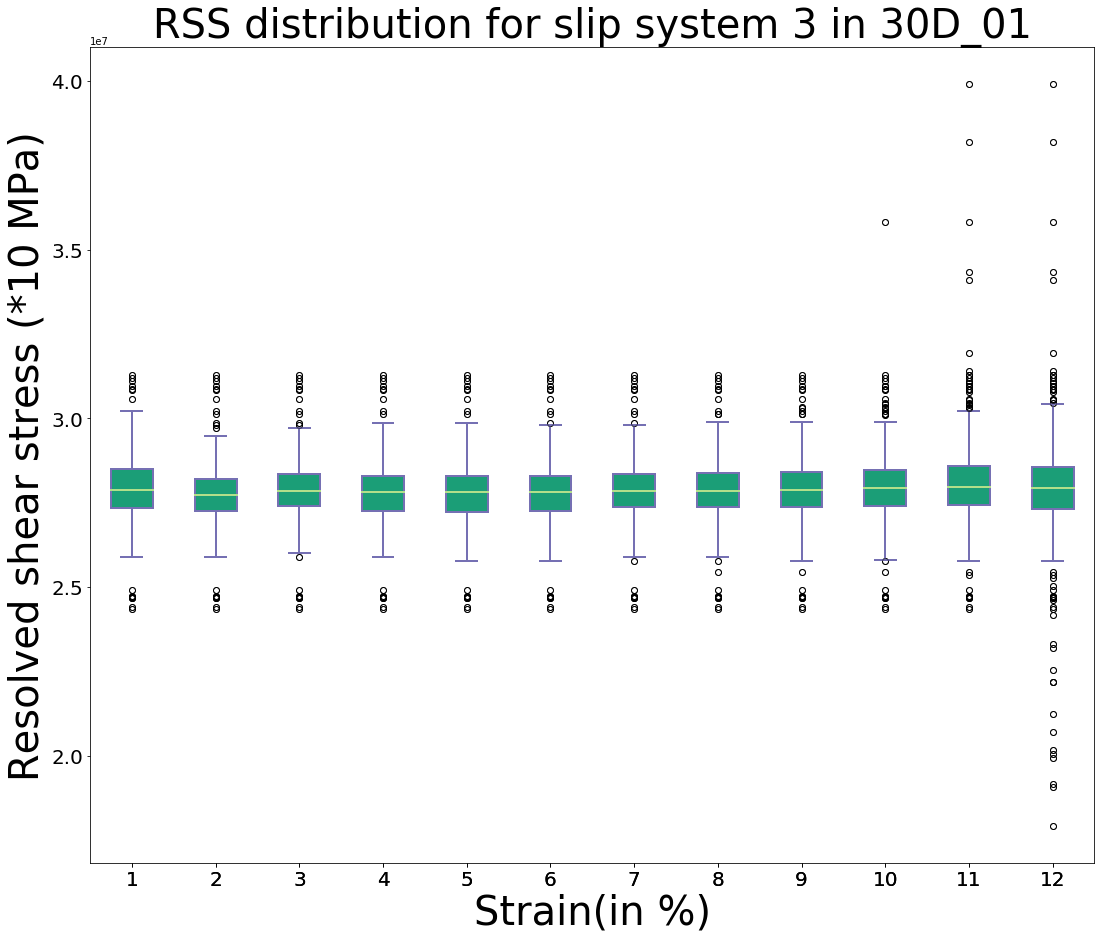

In [71]:
Nu_slip = np.arange(1,13)

fig = plt.figure(figsize = (18,15))
ax = plt.axes()
#ax.bar(Nu_slip,mean_ , label= "Slip system 1");
#mean_slip = [np.mean(slip_syst)]*len(Nu_slip)
#std_slip = [np.std(slip_syst)]*len(Nu_slip)

#mean_line = ax.plot(Nu_slip,mean_slip, label='Mean={}'.format(mean_slip[0]), linestyle='--')
#std_dev = ax.plot(Nu_slip,std_slip, label = "Standard Deviation ={}".format(std_slip[0]), linestyle="-.")

#plt.axis([0, 12, 0, 220])
#legend = ax.legend(loc='upper right')
# Create the boxplot
bp = ax.boxplot(data_to_plot)
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize = 20)
plt.xlabel("Strain(in %)",fontsize = 40)
plt.ylabel("Resolved shear stress (*10 MPa)", fontsize =40)
plt.title("RSS distribution for slip system 3 in 30D_01",fontsize = 40)
plt.savefig("30D_1_slipSys_{}.png".format(q))
plt.show()

